<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN(os.path.join("res","Diabetes.bif"))
#gnb.showBN(bn,size='8')
print(bn)



BN{nodes: 413, arcs: 602, domainSize: 10^406.108, dim: 461069}


### First, some helpers

In [3]:
import timeit

class Timer:    
    def __enter__(self):
        self.start =  timeit.default_timer()
        return self

    def __exit__(self, *args):
        self.end = timeit.default_timer()
        self.duration = self.end - self.start
        
        

In [4]:
def execute(ie):
    with Timer() as t:
        ie.makeInference()
        for i in bn.nodes():
            a=ie.posterior(i)
    return "duration : {:3.3f}s".format(t.duration)
    
def vals(bn,ie):
    exact=[]
    appro=[]
    for node in bn.nodes():
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()

    return exact
    
    

### Exact inference.

In [5]:
plt.rcParams["figure.figsize"] = [30,3]
import IPython.display
IPython.display.set_matplotlib_formats('png')

def compareIE(bn,maxtime,epsilon,evs=None):
    ie=gum.LazyPropagation(bn)
    if evs is not None:
        ie.setEvidence(evs)
    x=vals(bn,ie)
    
    ie2=gum.GibbsSampling(bn)
    if evs is not None:
        ie2.setEvidence(evs)
    ie2.setMaxTime(maxtime)
    ie2.setEpsilon(epsilon)
    txt="Gibbs : "+execute(ie2)+"\n"+ie2.messageApproximationScheme()
    y=vals(bn,ie2)
    plt.subplot(181)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie3=gum.MonteCarloSampling(bn)
    if evs is not None:
        ie3.setEvidence(evs)
    ie3.setMaxTime(maxtime)
    ie3.setEpsilon(epsilon)
    txt="MonteCarlo : "+execute(ie3)+"\n"+ie3.messageApproximationScheme()
    y=vals(bn,ie3)
    plt.subplot(182)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie4=gum.WeightedSampling(bn)
    if evs is not None:
        ie4.setEvidence(evs)
    ie4.setMaxTime(maxtime)
    ie4.setEpsilon(epsilon)
    txt="Weighted : "+execute(ie4)+"\n"+ie4.messageApproximationScheme()
    y=vals(bn,ie4)
    plt.subplot(183)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie5=gum.ImportanceSampling(bn)
    if evs is not None:
        ie5.setEvidence(evs)
    ie5.setMaxTime(maxtime)
    ie5.setEpsilon(epsilon)
    txt="Importance: "+execute(ie5)+"\n"+ie5.messageApproximationScheme()
    y=vals(bn,ie5)
    plt.subplot(184)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie6=gum.LoopyBeliefPropagation(bn)
    if evs is not None:
        ie6.setEvidence(evs)
    ie6.setMaxTime(maxtime)
    ie6.setEpsilon(epsilon)
    txt="LBP: "+execute(ie6)+"\n"+ie6.messageApproximationScheme()
    y=vals(bn,ie6)
    plt.subplot(185)
    plt.plot(x,y,'ro')
    plt.title(txt)
    
    ie7=gum.LoopyWeightedSampling(bn)
    if evs is not None:
        ie7.setEvidence(evs)
    ie7.setMaxTime(maxtime)
    ie7.setEpsilon(epsilon)
    txt="LoopyWeighted: "+execute(ie7)+"\n"+ie7.messageApproximationScheme()
    y=vals(bn,ie7)
    plt.subplot(186)
    plt.plot(x,y,'ro')
    plt.title(txt)
    
    ie8=gum.LoopyGibbsSampling(bn)
    if evs is not None:
        ie8.setEvidence(evs)
    ie8.setMaxTime(maxtime)
    ie8.setEpsilon(epsilon)
    txt="LoopyGibbs: "+execute(ie8)+"\n"+ie8.messageApproximationScheme()
    y=vals(bn,ie8)
    plt.subplot(187)
    plt.plot(x,y,'ro')
    plt.title(txt)
    
    ie9=gum.LoopyImportanceSampling(bn)
    if evs is not None:
        ie9.setEvidence(evs)
    ie9.setMaxTime(maxtime)
    ie9.setEpsilon(epsilon)
    txt="LoopyImportance: "+execute(ie8)+"\n"+ie8.messageApproximationScheme()
    y=vals(bn,ie9)
    plt.subplot(188)
    plt.plot(x,y,'ro')
    plt.title(txt)
    
    plt.show()


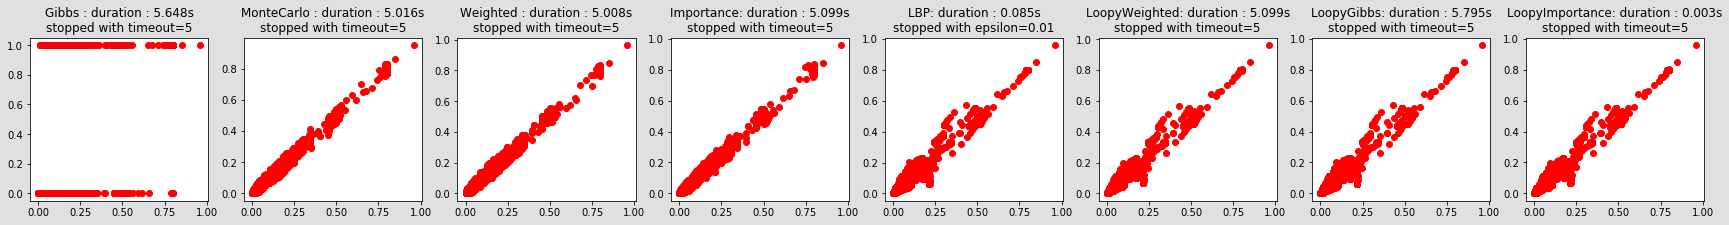

In [6]:
compareIE(bn,5,1e-2)

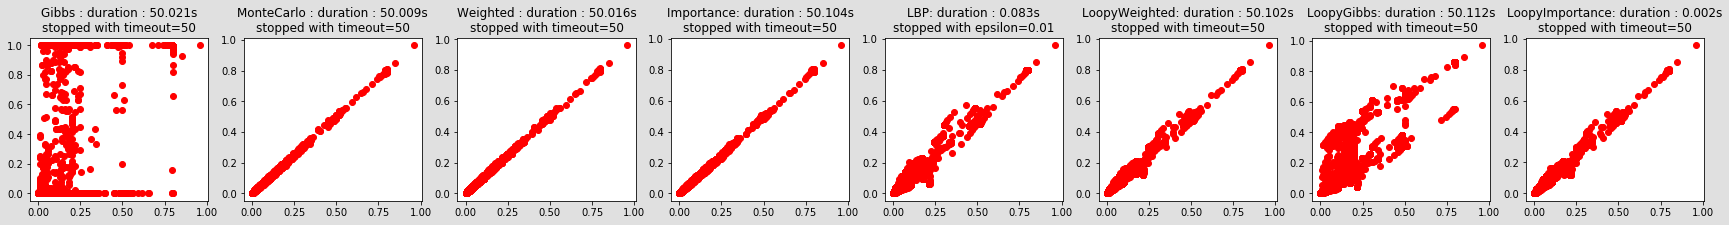

In [7]:
compareIE(bn,50,1e-2)

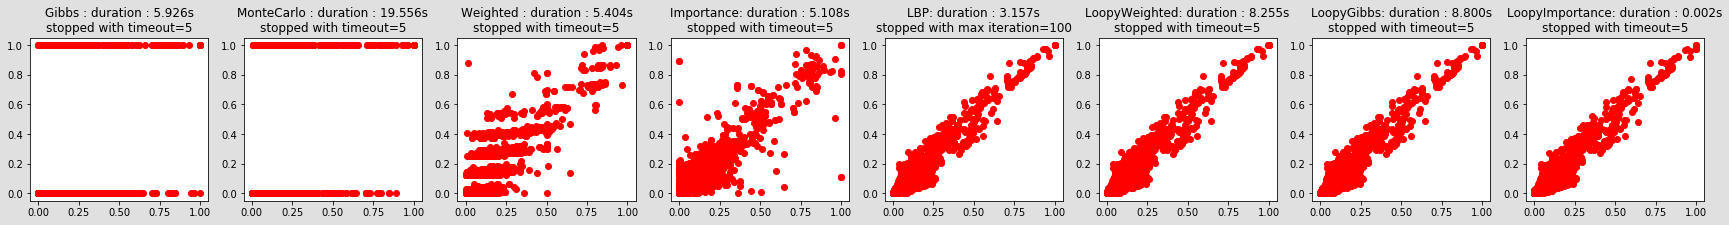

In [8]:
compareIE(bn,5,1e-2,evs={'bg_24':0,'ins_indep_util_23':1,'renal_cl_14':1})

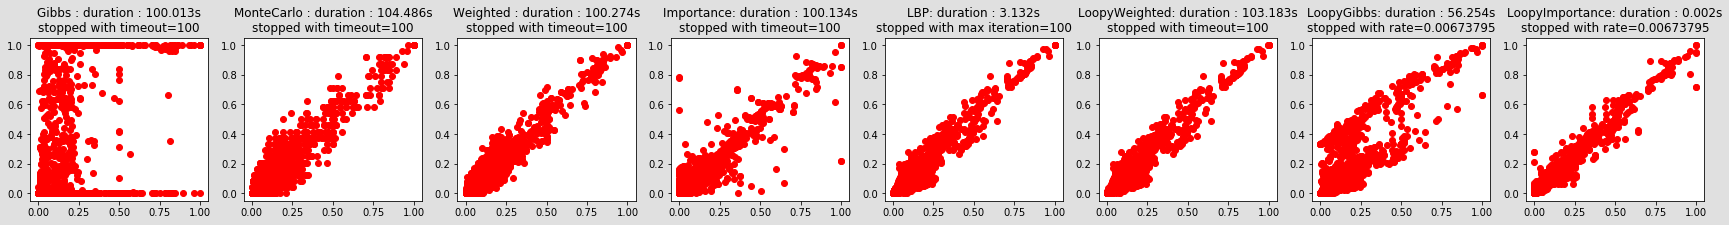

In [9]:
compareIE(bn,100,1e-2,evs={'bg_24':0,'ins_indep_util_23':1,'renal_cl_14':1})